In [4]:
import pandas as pd
from dbnomics import fetch_series, fetch_series_by_api_link

In [5]:
df = fetch_series('AMECO/ZUTN/EA19.1.0.0.0.ZUTN')

In [6]:
df = df.dropna()
df.head()

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,freq,unit,geo,Frequency,Unit,Country
37,annual,AMECO,ZUTN,Unemployment rate: total :- Member States: def...,EA19.1.0.0.0.ZUTN,Annually – (Percentage of active population) –...,1997,1997-01-01,11.5,11.5,a,percentage-of-active-population,ea19,Annually,(Percentage of active population),Euro area
38,annual,AMECO,ZUTN,Unemployment rate: total :- Member States: def...,EA19.1.0.0.0.ZUTN,Annually – (Percentage of active population) –...,1998,1998-01-01,11,11.0,a,percentage-of-active-population,ea19,Annually,(Percentage of active population),Euro area
39,annual,AMECO,ZUTN,Unemployment rate: total :- Member States: def...,EA19.1.0.0.0.ZUTN,Annually – (Percentage of active population) –...,1999,1999-01-01,10.2,10.2,a,percentage-of-active-population,ea19,Annually,(Percentage of active population),Euro area
40,annual,AMECO,ZUTN,Unemployment rate: total :- Member States: def...,EA19.1.0.0.0.ZUTN,Annually – (Percentage of active population) –...,2000,2000-01-01,9.2,9.2,a,percentage-of-active-population,ea19,Annually,(Percentage of active population),Euro area
41,annual,AMECO,ZUTN,Unemployment rate: total :- Member States: def...,EA19.1.0.0.0.ZUTN,Annually – (Percentage of active population) –...,2001,2001-01-01,8.4,8.4,a,percentage-of-active-population,ea19,Annually,(Percentage of active population),Euro area


In [12]:
# settings
alpha = 0.05

## Стационарный временной ряд

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.stattools import jarque_bera
from scipy import stats
from statsmodels.iolib.table import SimpleTable

In [20]:
import itertools

In [21]:
df.set_index('period', inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,original_value,value,freq,unit,geo,Frequency,Unit,Country
period,,,,,,,,,,,,,,,
1997-01-01,annual,AMECO,ZUTN,Unemployment rate: total :- Member States: def...,EA19.1.0.0.0.ZUTN,Annually – (Percentage of active population) –...,1997,11.5,11.5,a,percentage-of-active-population,ea19,Annually,(Percentage of active population),Euro area
1998-01-01,annual,AMECO,ZUTN,Unemployment rate: total :- Member States: def...,EA19.1.0.0.0.ZUTN,Annually – (Percentage of active population) –...,1998,11,11.0,a,percentage-of-active-population,ea19,Annually,(Percentage of active population),Euro area
1999-01-01,annual,AMECO,ZUTN,Unemployment rate: total :- Member States: def...,EA19.1.0.0.0.ZUTN,Annually – (Percentage of active population) –...,1999,10.2,10.2,a,percentage-of-active-population,ea19,Annually,(Percentage of active population),Euro area
2000-01-01,annual,AMECO,ZUTN,Unemployment rate: total :- Member States: def...,EA19.1.0.0.0.ZUTN,Annually – (Percentage of active population) –...,2000,9.2,9.2,a,percentage-of-active-population,ea19,Annually,(Percentage of active population),Euro area
2001-01-01,annual,AMECO,ZUTN,Unemployment rate: total :- Member States: def...,EA19.1.0.0.0.ZUTN,Annually – (Percentage of active population) –...,2001,8.4,8.4,a,percentage-of-active-population,ea19,Annually,(Percentage of active population),Euro area


In [22]:
series = df['value']
# for series decomposition
series.index = pd.to_datetime(series.index) 

#### Визуальная инспекция

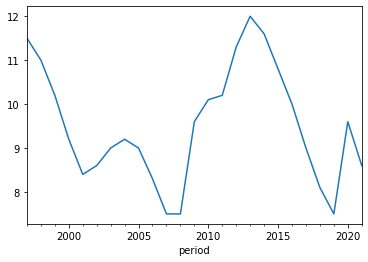

In [23]:
series.plot()
plt.show()

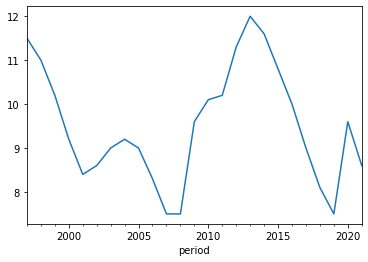

In [24]:
resampled_series = series.resample('A').mean()
resampled_series.plot()
plt.show()

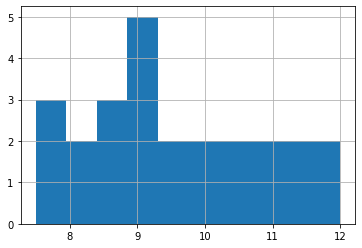

In [25]:
series.hist()
plt.show()

 Мы видим колоколообразную форму Гауссова распределения, с  длинным правым хвостом.

In [26]:
result_hist = series.describe()
result_hist

count    25.000000
mean      9.512000
std       1.332391
min       7.500000
25%       8.600000
50%       9.200000
75%      10.200000
max      12.000000
Name: value, dtype: float64

In [27]:
print('V = %f' % (result_hist.loc['std'] / result_hist.loc['mean']))

V = 0.140075


In [28]:
split = int(series.shape[0] / 2)
series1, series2 = series.values[:split], series.values[split:]
mean1, mean2 = series1.mean(), series2.mean()
var1, var2 = series1.var(), series2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=9.116667, mean2=9.876923
variance1=1.426389, variance2=1.683314


Пример стационарного процесса: Белый шум.

### Выделение составляющих временного ряда

In [34]:
decomposition_result = seasonal_decompose(series)

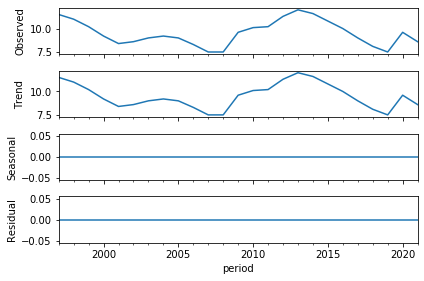

In [35]:
decomposition_result.plot()
plt.show()

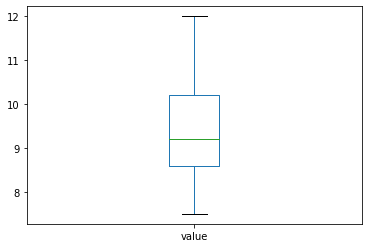

In [31]:
series.plot.box()
plt.show()

### Статистические тесты

#### Стационарность

In [36]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [37]:
adfuller_result = adfuller(series.squeeze())
print('ADF Statistic: %f' % adfuller_result[0])
print('p-value: %f' % adfuller_result[1])
print('lags used: %f' % adfuller_result[2])
print('Critical Values:')
for key, value in adfuller_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.016121
p-value: 0.279550
lags used: 0.000000
Critical Values:
	1%: -3.738
	5%: -2.992
	10%: -2.636


В качестве части выходных данных мы получаем таблицу поиска, которая помогает определить статистику ADF. Мы видим, что наше  значение -2.016121 больше чем значение -3.738, соответствующее значению p-value 1%.

Это говорит о том, что мы  НЕ можем отвергнуть нулевую гипотезу с уровнем значимости менее 1% (т. е. с низкой вероятностью, что результат является статистической случайностью).

In [38]:
kpsstest = kpss(series.values.squeeze(), regression='c')
print('KPSS Statistic: %f' % kpsstest[0])
print('p-value: %f' % kpsstest[1])
print('lags used: %f' % kpsstest[2])
print('Critical Values:')
for key, value in kpsstest[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS Statistic: 0.138536
p-value: 0.100000
lags used: 9.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


В соответствии с полученным значением статистики KPSS теста нулевая гипотеза о нестационарности временного ряда не отвергается.

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

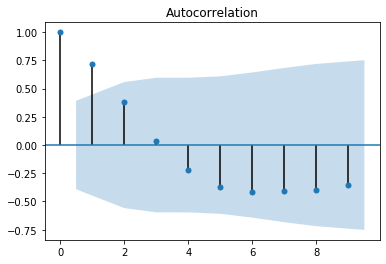

In [40]:
plot_acf(series.values.squeeze(), lags=9)
plt.show()

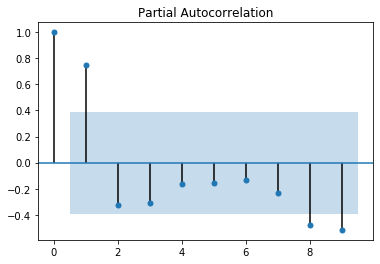

In [41]:
plot_pacf(series.values.squeeze(), lags=9)
plt.show()

#### Нормальность

In [45]:
k2, p = stats.normaltest(series)
print("p = {}".format(round(p, 5)))
if p < alpha:  # null hypothesis: series comes from a normal distribution
    print("Нулевая гипотеза может быть отвергнута.")
else:
    print("Нулевая гипотеза не может быть отвергнута, выборка - из нормального распределения.")

p = 0.43743
Нулевая гипотеза не может быть отвергнута, выборка - из нормального распределения.


#### Гомоскедастичность

Levene's test является альтернативой Bartlett's test (scipy.stats.bartlett) в том случае, когда имеются значительные отклонения от нормального распределения.

In [48]:
series_parts = np.array_split(series.values.squeeze(), 4)
index_combinations = itertools.product(list(range(4)), list(range(4)))
count_homosced = 0
count_heterosced = 0
for idx1, idx2 in index_combinations:
    statistic, p = stats.levene(series_parts[idx1], series_parts[idx2])
    if p < alpha:  # null hypothesis: all input samples are from populations with equal variances
        count_heterosced += 1
    else:
        count_homosced += 1

if count_homosced > count_heterosced:
    print("Нулевая гипотеза не может быть отвергнута - присутствует гомоскедастичность.")
else:
    print("Нулевая гипотеза может быть отвергнута - присутствует гетероскедастичность.")

Нулевая гипотеза не может быть отвергнута - присутствует гомоскедастичность.
